<a href="https://colab.research.google.com/github/sanjayyanadi/Supervised_Regression_Model/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [1]:
#importing libraries 
import pandas as pd
import numpy as np
from numpy import math
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
sns.set()
# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

In [2]:
from google.colab import drive
drive.mount('/content/drive/')  
df_rs = pd.read_csv('/content/drive/MyDrive/ALMABETTER/CAPSTONE_PROJECT/Supervised_Regression_Model/Rossmann_Stores_Data.csv')
df_s= pd.read_csv('/content/drive/MyDrive/ALMABETTER/CAPSTONE_PROJECT/Supervised_Regression_Model/store.csv')

Mounted at /content/drive/


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
# first ten and last ten data of rossmann stores data
df_rs.T

,0,1,2,3,4,5,6,7,8,9,...,1017199,1017200,1017201,1017202,1017203,1017204,1017205,1017206,1017207,1017208
Store,1,2,3,4,5,6,7,8,9,10,...,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115
DayOfWeek,5,5,5,5,5,5,5,5,5,5,...,2,2,2,2,2,2,2,2,2,2
Date,2015-07-31,2015-07-31,2015-07-31,2015-07-31,2015-07-31,2015-07-31,2015-07-31,2015-07-31,2015-07-31,2015-07-31,...,2013-01-01,2013-01-01,2013-01-01,2013-01-01,2013-01-01,2013-01-01,2013-01-01,2013-01-01,2013-01-01,2013-01-01
Sales,5263,6064,8314,13995,4822,5651,15344,8492,8565,7185,...,0,0,0,0,0,0,0,0,0,0
Customers,555,625,821,1498,559,589,1414,833,687,681,...,0,0,0,0,0,0,0,0,0,0
Open,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
Promo,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
StateHoliday,0,0,0,0,0,0,0,0,0,0,...,a,a,a,a,a,a,a,a,a,a
SchoolHoliday,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [4]:
# first ten and last ten data of store data
df_s.T

,0,1,2,3,4,5,6,7,8,9,...,1105,1106,1107,1108,1109,1110,1111,1112,1113,1114
Store,1,2,3,4,5,6,7,8,9,10,...,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115
StoreType,c,a,a,c,a,a,a,a,a,a,...,a,a,a,c,c,a,c,a,a,d
Assortment,a,a,a,c,a,a,c,a,c,a,...,c,a,a,a,c,a,c,c,c,c
CompetitionDistance,1270.0,570.0,14130.0,620.0,29910.0,310.0,24000.0,7520.0,2030.0,3160.0,...,5330.0,1400.0,540.0,3490.0,900.0,1900.0,1880.0,9260.0,870.0,5350.0
CompetitionOpenSinceMonth,9.0,11.0,12.0,9.0,4.0,12.0,4.0,10.0,8.0,9.0,...,9.0,6.0,4.0,4.0,9.0,6.0,4.0,NaN,NaN,NaN
CompetitionOpenSinceYear,2008.0,2007.0,2006.0,2009.0,2015.0,2013.0,2013.0,2014.0,2000.0,2009.0,...,2011.0,2012.0,2004.0,2011.0,2010.0,2014.0,2006.0,NaN,NaN,NaN
Promo2,0,1,1,0,0,0,0,0,0,0,...,1,1,0,1,0,1,0,0,0,1
Promo2SinceWeek,NaN,13.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,31.0,13.0,NaN,22.0,NaN,31.0,NaN,NaN,NaN,22.0
Promo2SinceYear,NaN,2010.0,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2013.0,2010.0,NaN,2012.0,NaN,2013.0,NaN,NaN,NaN,2012.0
PromoInterval,NaN,"Jan,Apr,Jul,Oct","Jan,Apr,Jul,Oct",NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"Jan,Apr,Jul,Oct","Jan,Apr,Jul,Oct",NaN,"Jan,Apr,Jul,Oct",NaN,"Jan,Apr,Jul,Oct",NaN,NaN,NaN,"Mar,Jun,Sept,Dec"


In [ ]:
#information od two dataset with respect to data and type
print(df_rs.info())
print(df_s.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   A

In [ ]:
#checking for null values with respect to two dataset
print(df_rs.isnull().sum())
print(df_s.isnull().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


from above data we can see that there are null values in stores data

In [ ]:
#checking for unique data with respect to colums of the datasetw
print(df_rs.nunique())
print(df_s.nunique())

Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64
Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64


In [5]:
# filling the null data based on type of feature
df_s.loc[np.isnan(df_s['CompetitionDistance']), 'CompetitionDistance'] = df_s['CompetitionDistance'].median()
df_s.loc[np.isnan(df_s['CompetitionOpenSinceMonth']), 'CompetitionOpenSinceMonth'] = df_s['CompetitionOpenSinceMonth'].mode()
df_s.loc[np.isnan(df_s['CompetitionOpenSinceYear']), 'CompetitionOpenSinceYear'] = df_s['CompetitionOpenSinceYear'].mode()
df_s.fillna(0,inplace=True)

In [6]:
# checking for null values for two databases
print(df_rs.isnull().sum())
print(df_s.isnull().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64
Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


In [11]:
# merging the two datasets with similar column entity of store
df = pd.merge(df_rs, df_s, on='Store')
df.reset_index(drop=True, inplace=True)
df.reset_index()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [12]:
#defining the date with respect to year, month, day, quarter,and day of year.
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Day'] = pd.DatetimeIndex(df['Date']).day    
df['QuadYear'] = pd.DatetimeIndex(df['Date']).quarter
df['DayOfYear'] = pd.DatetimeIndex(df['Date']).day_of_year

In [13]:
#converting categorical data into numerical data and conveting data type object to int
#creating function
def converting_data(data):
    mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
    mappings2 = {'0':0, 'NaN':0, 'Jan,Apr,Jul,Oct':1, 'Feb,May,Aug,Nov':2, 'Mar,Jun,Sept,Dec':3}
    df.StoreType.replace(mappings, inplace=True)
    df.Assortment.replace(mappings, inplace=True)
    df.StateHoliday.replace(mappings, inplace=True)
    df.PromoInterval.replace(mappings2, inplace=True)
    df['StoreType'] = df['StoreType'].astype(int)
    df['Assortment'] = df['Assortment'].astype(int)
    df['StateHoliday'] = df['StateHoliday'].astype(int)
    df['PromoInterval'] = df['PromoInterval'].astype(int)
    df['CompetitionDistance'] = df['CompetitionDistance'].astype(int)
    df['CompetitionOpenSinceMonth'] = df['CompetitionOpenSinceMonth'].astype(int)
    df['CompetitionOpenSinceYear'] = df['CompetitionOpenSinceYear'].astype(int)
    df['Promo2SinceWeek'] = df['Promo2SinceWeek'].astype(int)
    df['Promo2SinceYear'] = df['Promo2SinceYear'].astype(int)

In [14]:
#excecute the function
converting_data(df)

In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 23 columns):
 #   Column                     Non-Null Count    Dtype 
---  ------                     --------------    ----- 
 0   Store                      1017209 non-null  int64 
 1   DayOfWeek                  1017209 non-null  int64 
 2   Date                       1017209 non-null  object
 3   Sales                      1017209 non-null  int64 
 4   Customers                  1017209 non-null  int64 
 5   Open                       1017209 non-null  int64 
 6   Promo                      1017209 non-null  int64 
 7   StateHoliday               1017209 non-null  int64 
 8   SchoolHoliday              1017209 non-null  int64 
 9   StoreType                  1017209 non-null  int64 
 10  Assortment                 1017209 non-null  int64 
 11  CompetitionDistance        1017209 non-null  int64 
 12  CompetitionOpenSinceMonth  1017209 non-null  int64 
 13  CompetitionOpenSinceYear   

In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,1017199,1017200,1017201,1017202,1017203,1017204,1017205,1017206,1017207,1017208
Store,1,1,1,1,1,1,1,1,1,1,...,1115,1115,1115,1115,1115,1115,1115,1115,1115,1115
DayOfWeek,5,4,3,2,1,7,6,5,4,3,...,4,3,2,1,7,6,5,4,3,2
Date,2015-07-31,2015-07-30,2015-07-29,2015-07-28,2015-07-27,2015-07-26,2015-07-25,2015-07-24,2015-07-23,2015-07-22,...,2013-01-10,2013-01-09,2013-01-08,2013-01-07,2013-01-06,2013-01-05,2013-01-04,2013-01-03,2013-01-02,2013-01-01
Sales,5263,5020,4782,5011,6102,0,4364,3706,3769,3464,...,5007,4649,5243,6905,0,4771,4540,4297,3697,0
Customers,555,546,523,560,612,0,500,459,503,463,...,339,324,341,471,0,339,326,300,305,0
Open,1,1,1,1,1,0,1,1,1,1,...,1,1,1,1,0,1,1,1,1,0
Promo,1,1,1,1,1,0,0,0,0,0,...,1,1,1,1,0,0,0,0,0,0
StateHoliday,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
SchoolHoliday,1,1,1,1,1,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
StoreType,3,3,3,3,3,3,3,3,3,3,...,4,4,4,4,4,4,4,4,4,4


In [ ]:
closed_df = df[df['Open'] == 0]
open_df = df[df['Open'] == 1]

In [ ]:
print('Total days = ',len(closed_df+open_df))
print('Number of shops/days OPEN = ', len(open_df))
print('Number of shops/days CLOSED = ', len(closed_df))

Total days =  1017209
Number of shops/days OPEN =  844392
Number of shops/days CLOSED =  172817


In [ ]:
print("sales with respect to day of week:" , df['DayOfWeek'].value_counts())
print("distinct number of stores: ", len(df['Store'].unique()))
print("maximum sales of stores: ", (df['Store'].max()))
print("average sales of stores: ", (df['Store'].mean()))
print("minimum sales of stores: ", (df['Store'].min()))
print("total sales of stores: ", (df['Store'].sum()))

sales with respect to day of week: 5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: DayOfWeek, dtype: int64
distinct number of stores:  1115
maximum sales of stores:  1115
average sales of stores:  558.4297268309659
minimum sales of stores:  1
total sales of stores:  568039744


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7facf79bd090>,
      dtype=object)

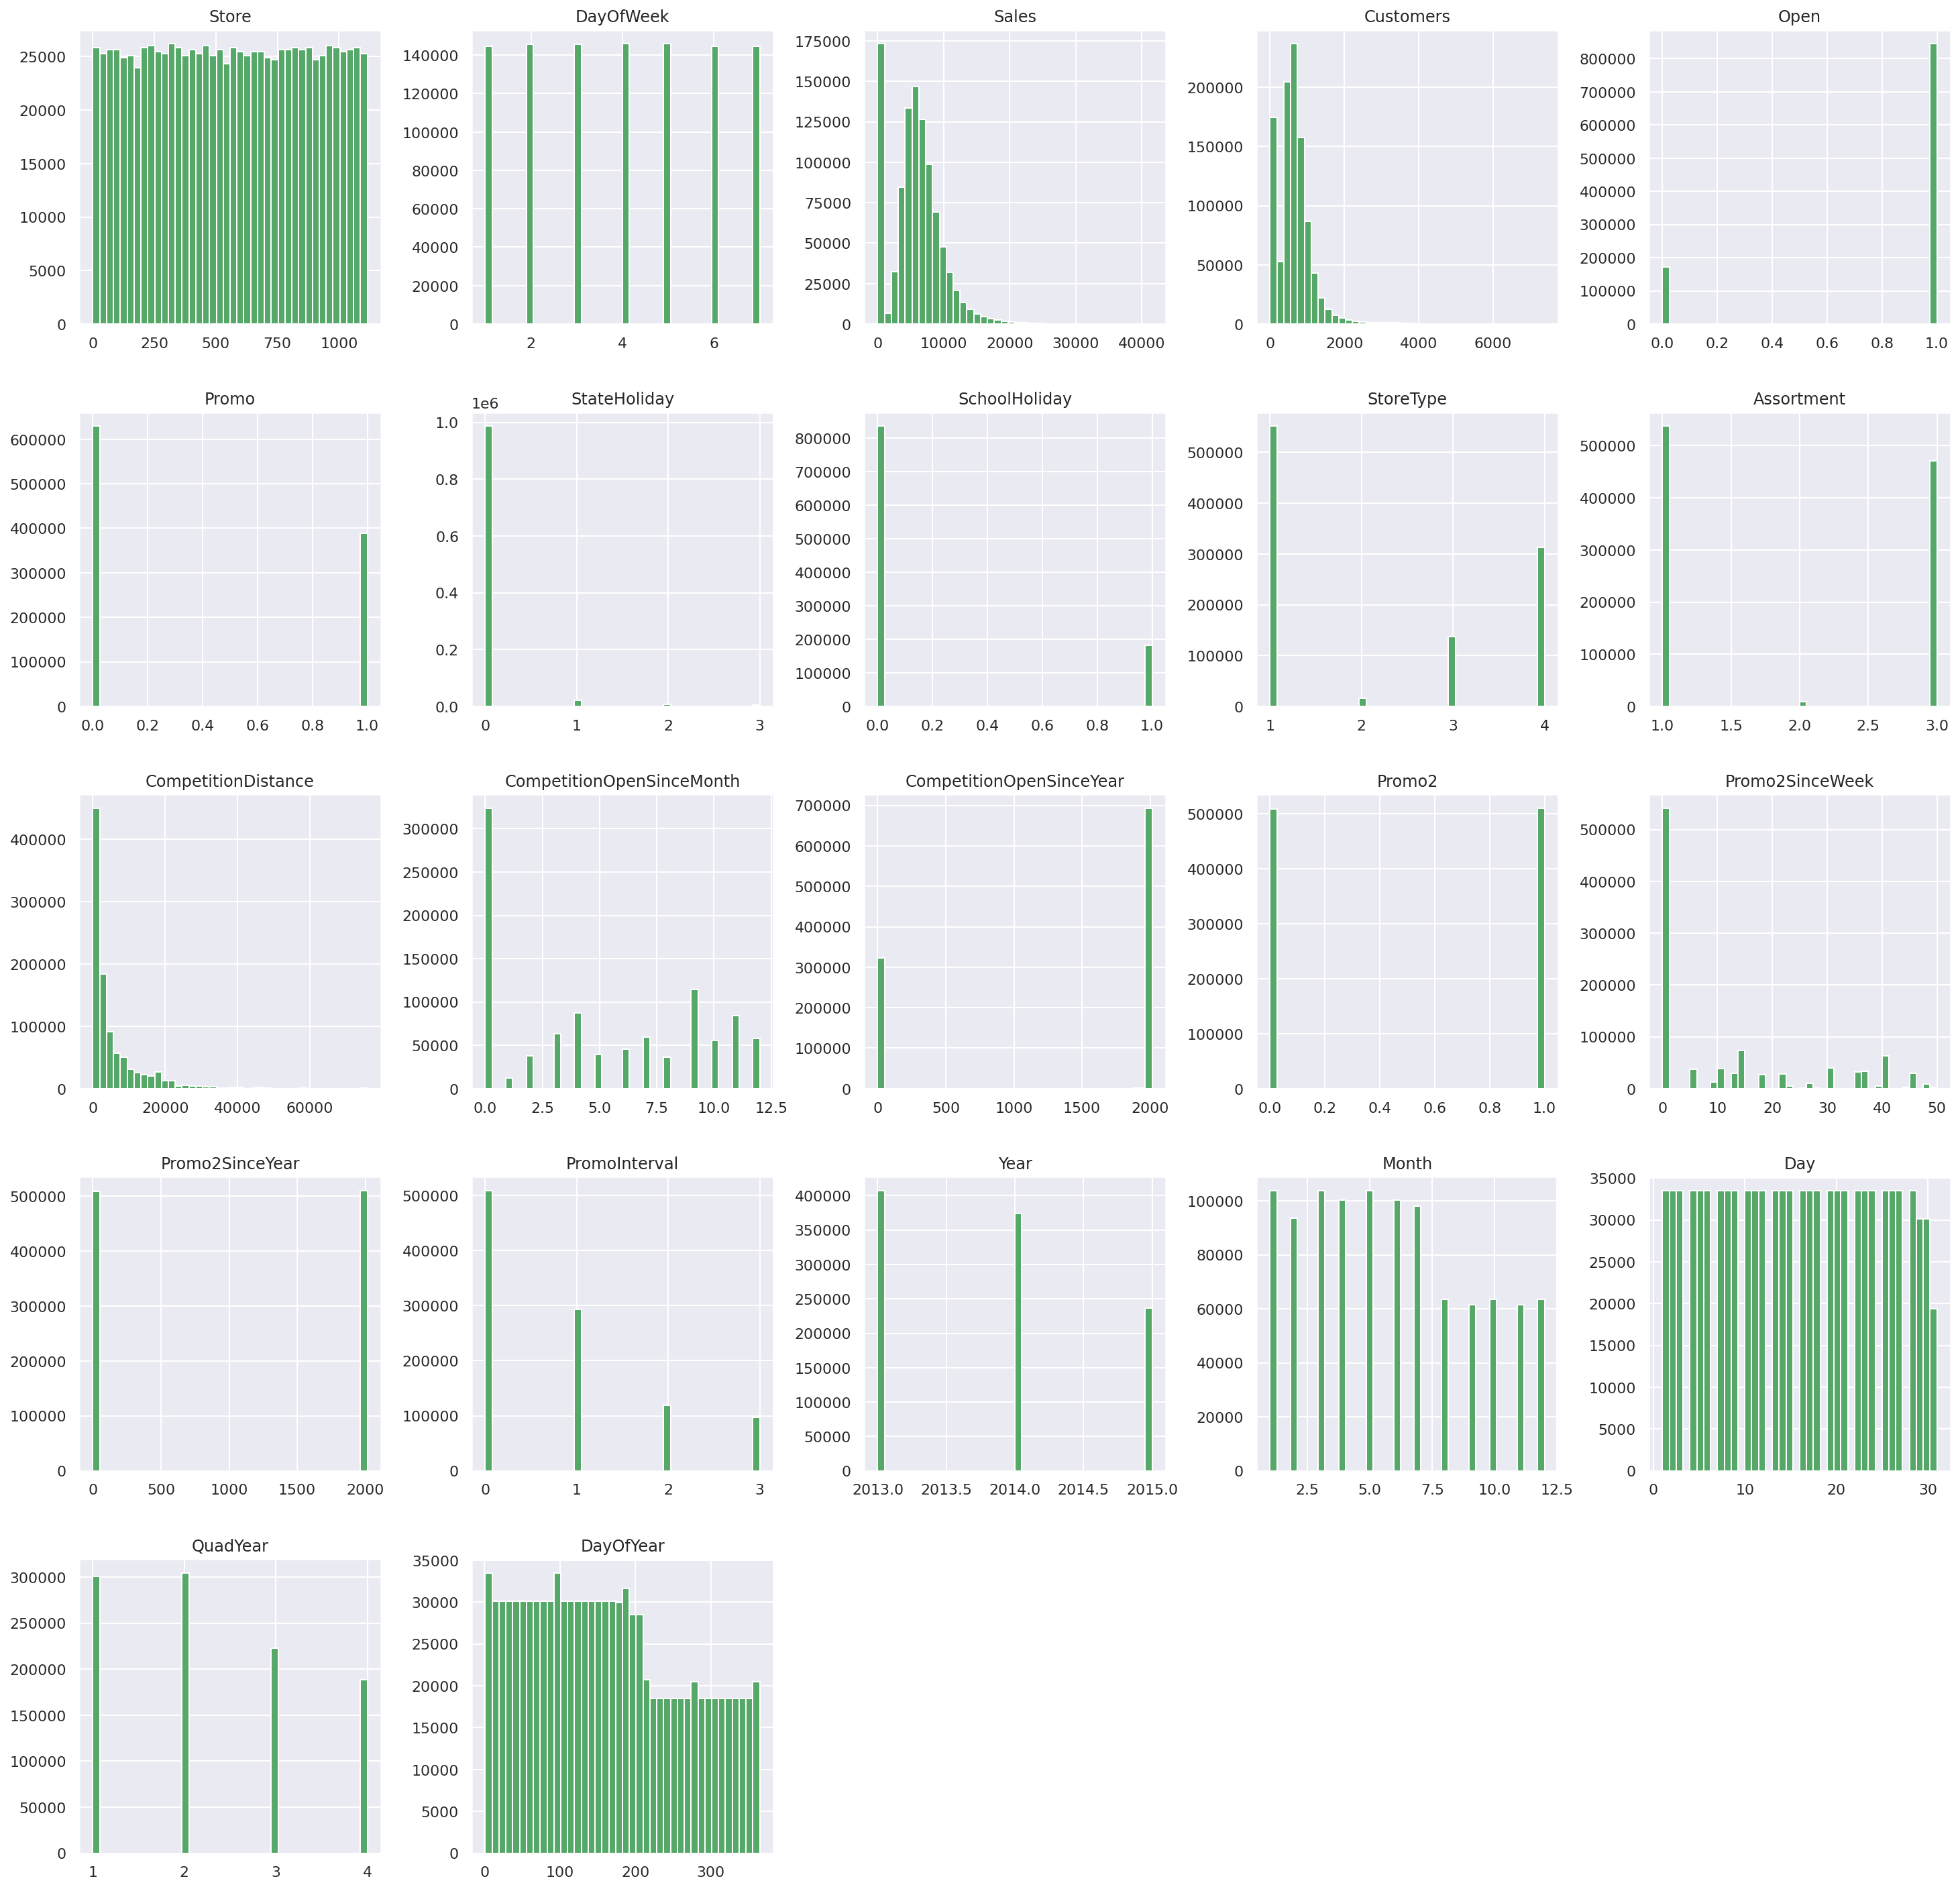

In [ ]:
df.hist(bins =40, figsize=(25,25), color='g')

Text(0.5, 1.0, 'Average sales per month')

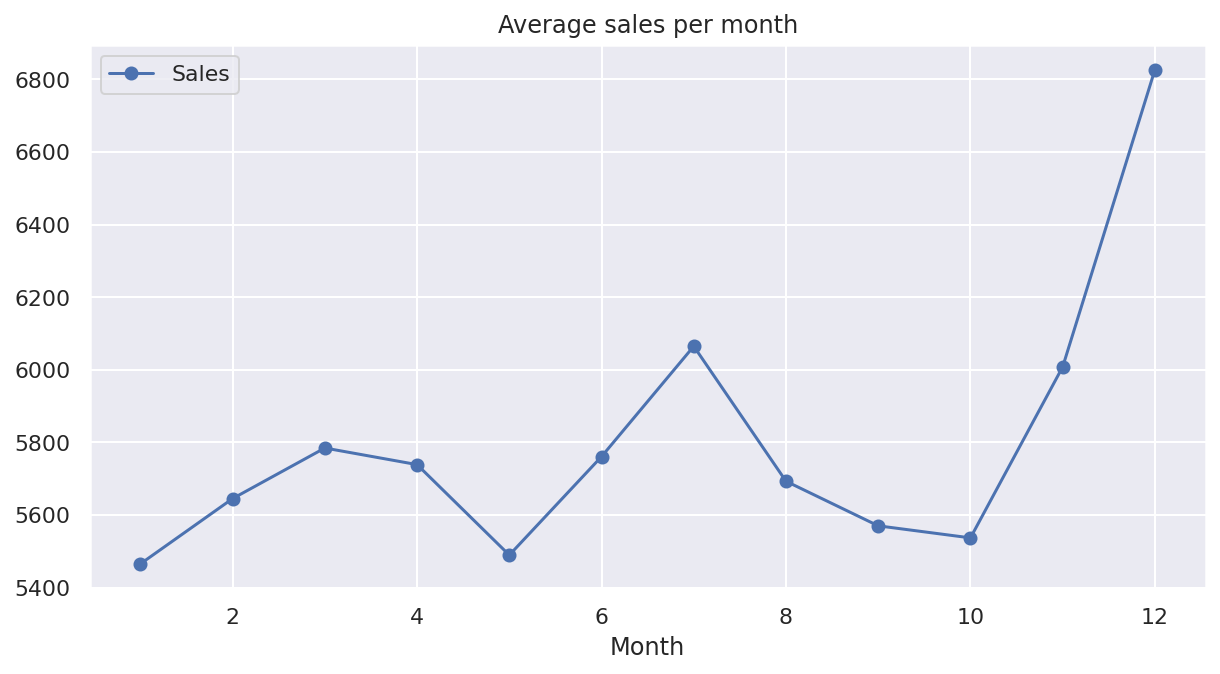

In [ ]:
axis = df.groupby('Month')[['Sales']].mean().plot(figsize=(10,5), marker = 'o')
axis.set_title('Average sales per month')

From the data above, we can observe that sales are high in December (12).

Text(0.5, 1.0, 'Average sales per day')

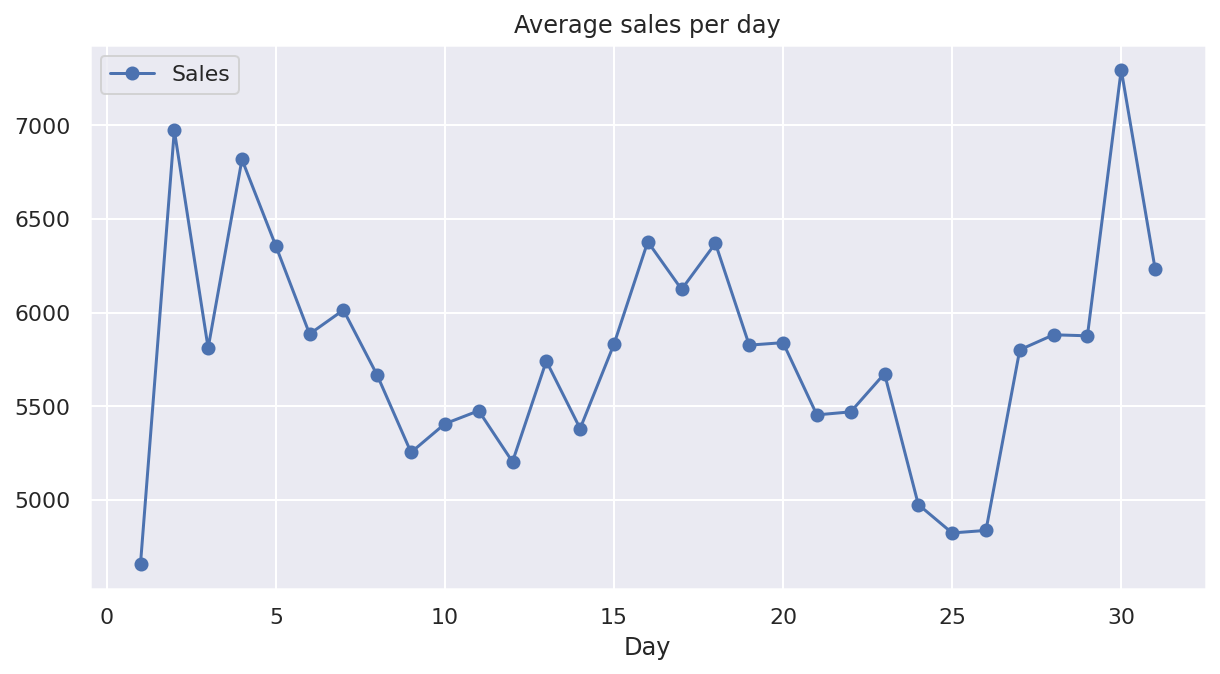

In [ ]:
axis = df.groupby('Day')[['Sales']].mean().plot(figsize=(10,5), marker = 'o')
axis.set_title('Average sales per day')

From the data above, we can observe that sales are high in the initial and last days of the month.

Text(0.5, 1.0, 'Average customers per month')

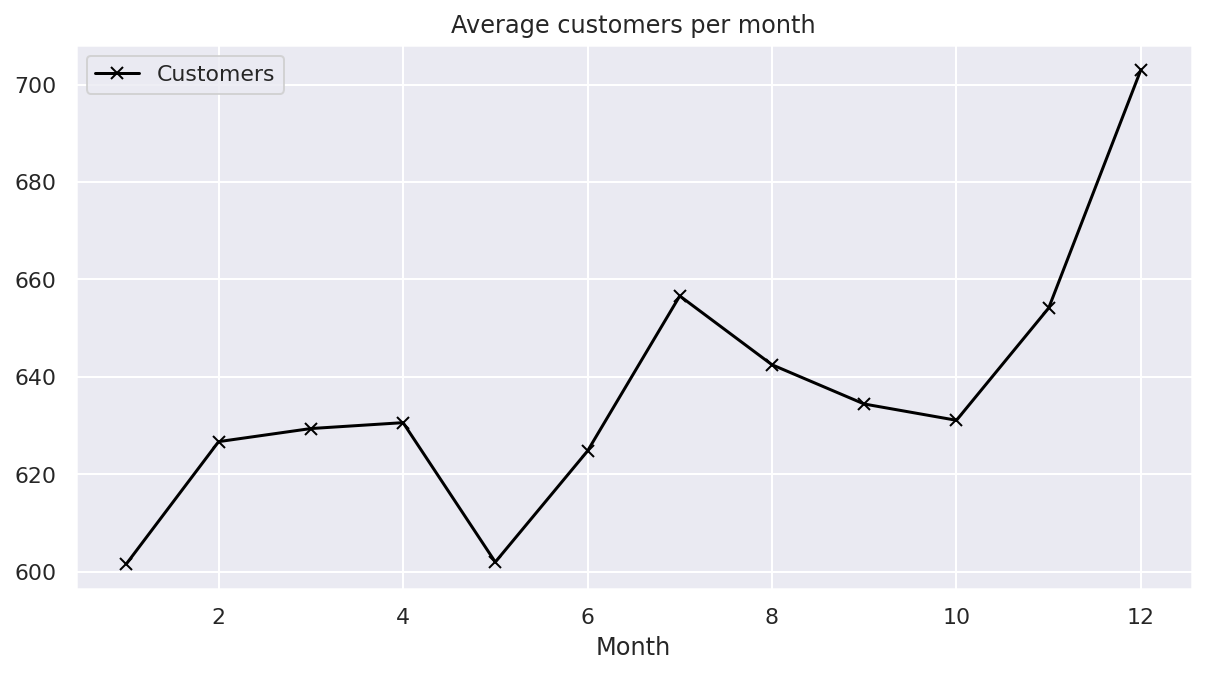

In [ ]:
axis = df.groupby('Month')[['Customers']].mean().plot(figsize=(10,5), marker = 'x', color = 'black')
axis.set_title('Average customers per month')

Text(0.5, 1.0, 'Average customers per day')

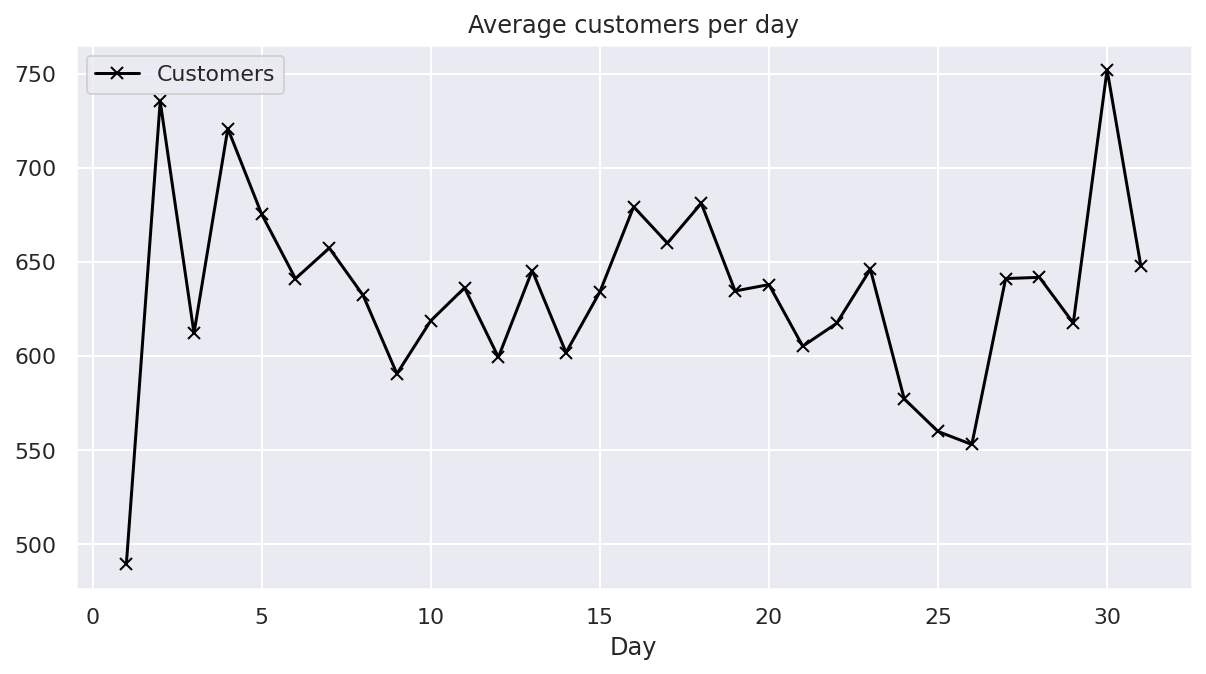

In [ ]:
axis = df.groupby('Day')[['Customers']].mean().plot(figsize=(10,5), marker = 'x', color = 'black')
axis.set_title('Average customers per day')

Text(0.5, 1.0, 'Average sales wrt Promo')

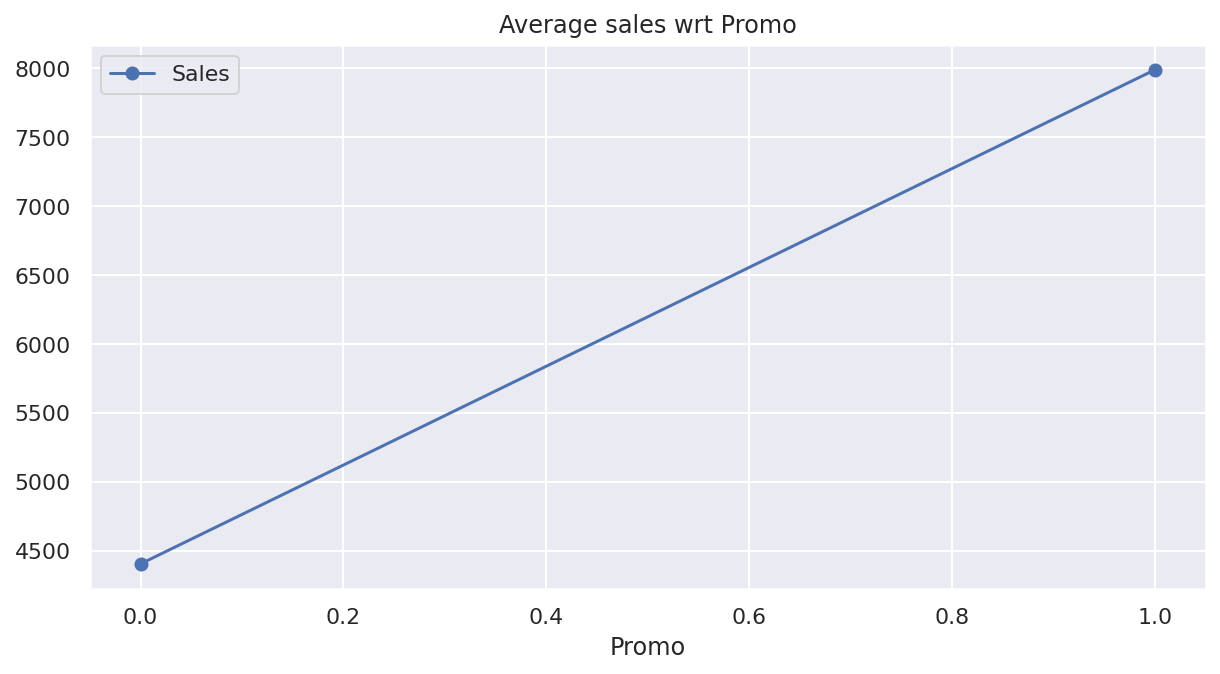

In [ ]:
axis = df.groupby('Promo')[['Sales']].mean().plot(figsize=(10,5), marker = 'o')
axis.set_title('Average sales wrt Promo')

Text(0.5, 1.0, 'Average sales wrt Promo2')

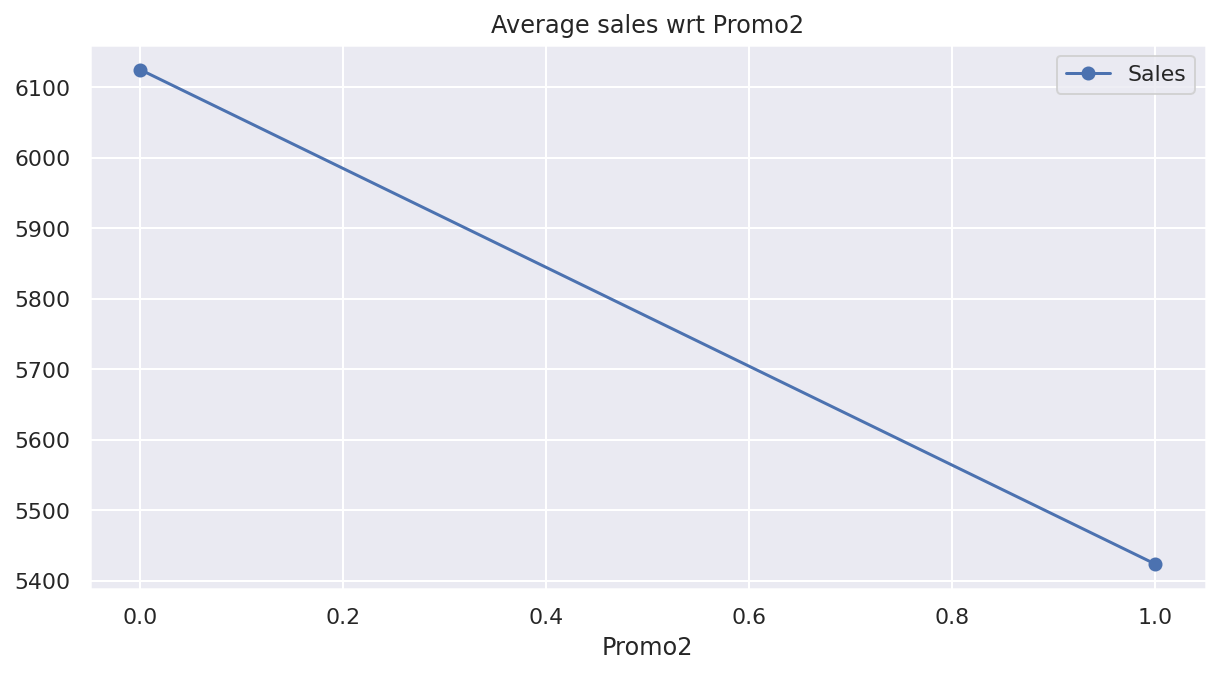

In [ ]:
axis = df.groupby('Promo2')[['Sales']].mean().plot(figsize=(10,5), marker = 'o')
axis.set_title('Average sales wrt Promo2')

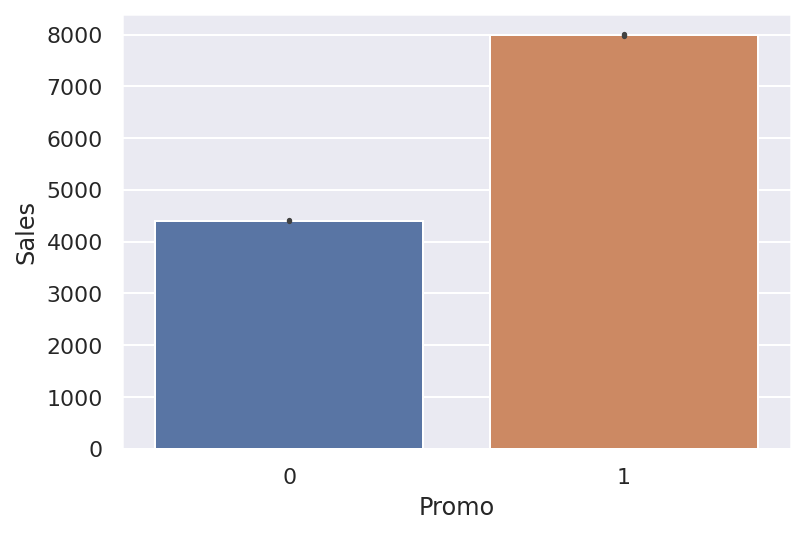

In [ ]:
sns.barplot(x = 'Promo', y = 'Sales', data = df)

For the data above, we can observe that the sales are not higher when we compare the promo.

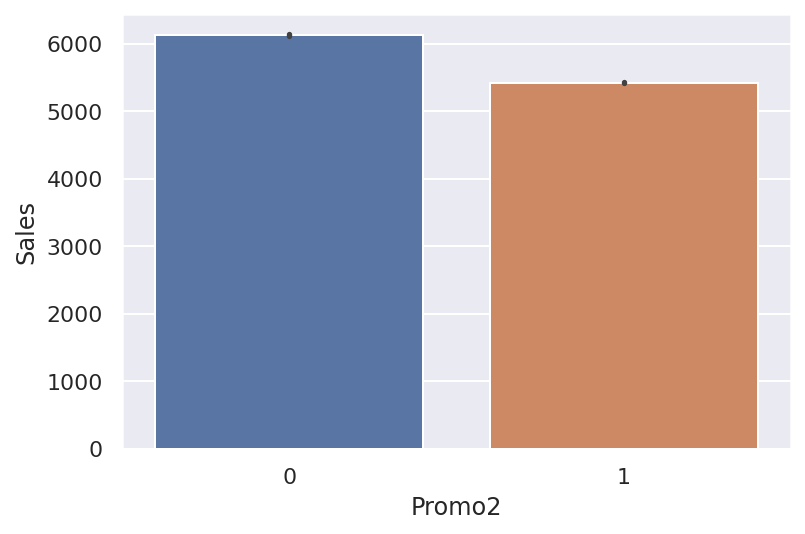

In [ ]:
sns.barplot(x = 'Promo2', y = 'Sales', data = df)

For the data above, we can observe that the sales are higher when we compare the promo2.

[]

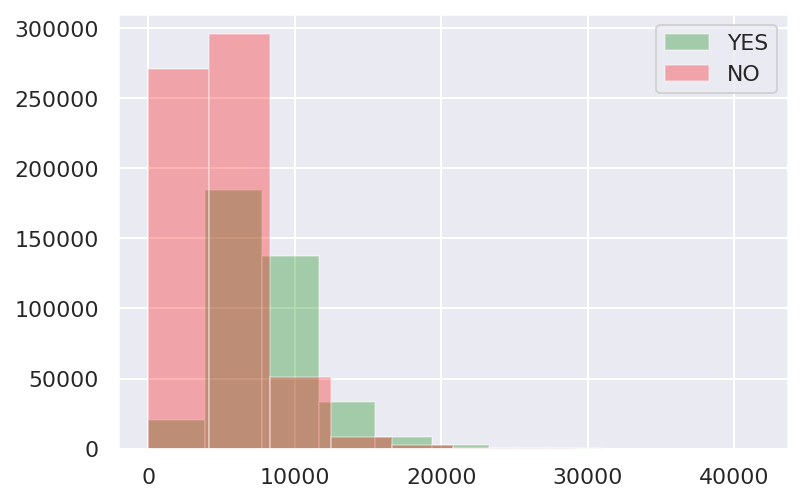

In [ ]:
# Sales_Promo
sns.set()
plt.hist(df[df['Promo'] == 1].Sales, color='green', alpha=0.3, label = 'YES')
plt.hist(df[df['Promo'] == 0].Sales, color='red', alpha=0.3, label = 'NO')
plt.legend()
plt.plot()

For the data above, we can observe that the sales are not higher when we compare the promo.

[]

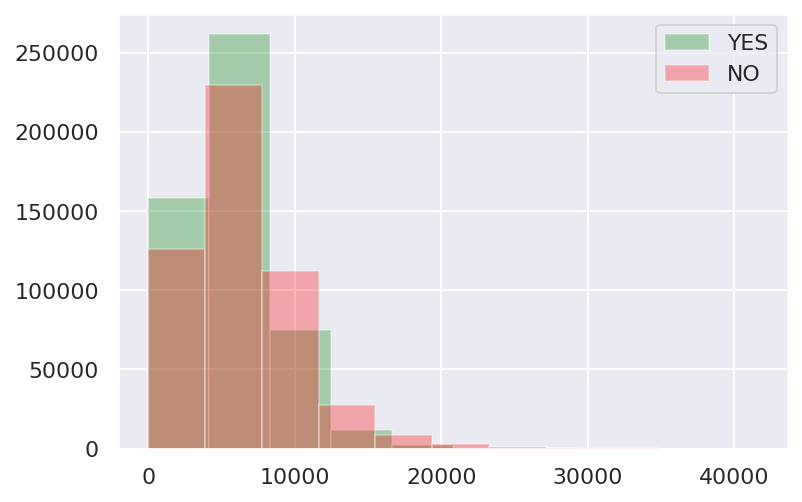

In [ ]:
# Sales_Promo2
sns.set()
plt.hist(df[df['Promo2'] == 1].Sales, color='green', alpha=0.3, label = 'YES')
plt.hist(df[df['Promo2'] == 0].Sales, color='red', alpha=0.3, label = 'NO')
plt.legend()
plt.plot()

For the data above, we can observe that the sales are higher when we compare the promo2.

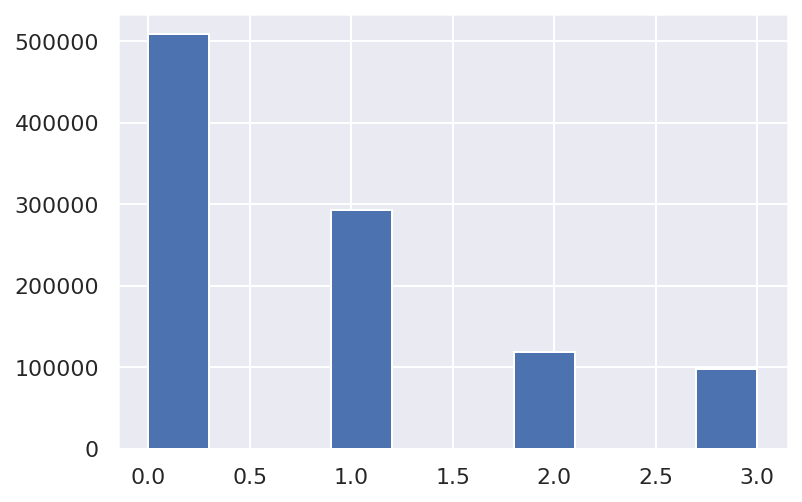

In [ ]:
#PromoInterval
df['PromoInterval'].hist()

Clearly, most of the stores prefer the Jan,Apr,Jul,Oct Promo interval.

[]

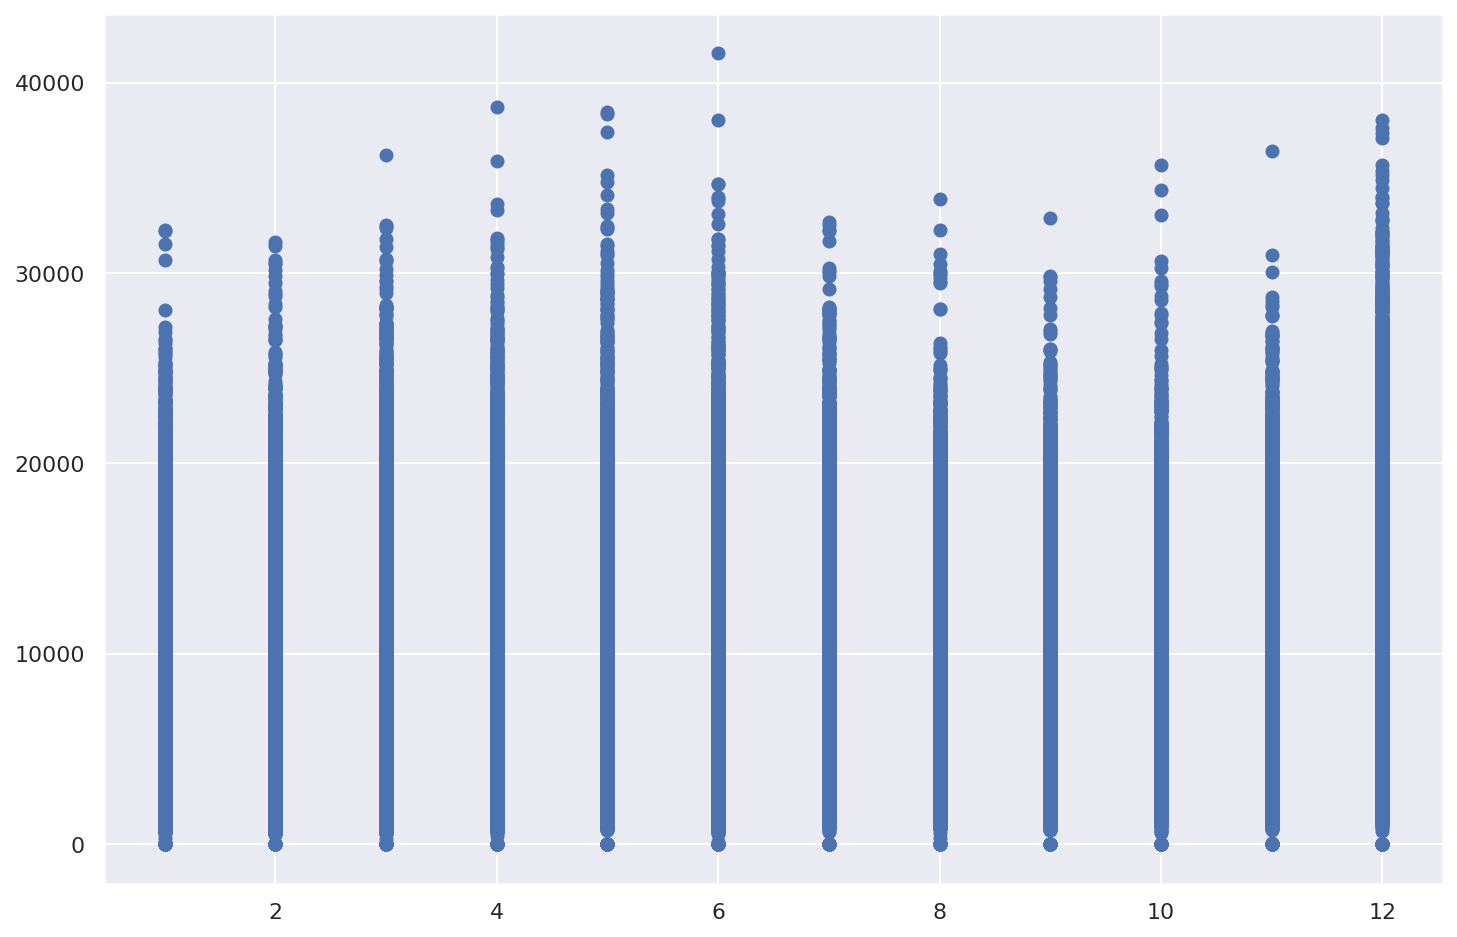

In [ ]:
#Sales_Month
plt.figure(figsize=(12, 8))
plt.scatter(df["Month"],df["Sales"])
plt.plot()

From the above data, we can see the average sales are around 20000 to 30000.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7de95120d0>,
      dtype=object)

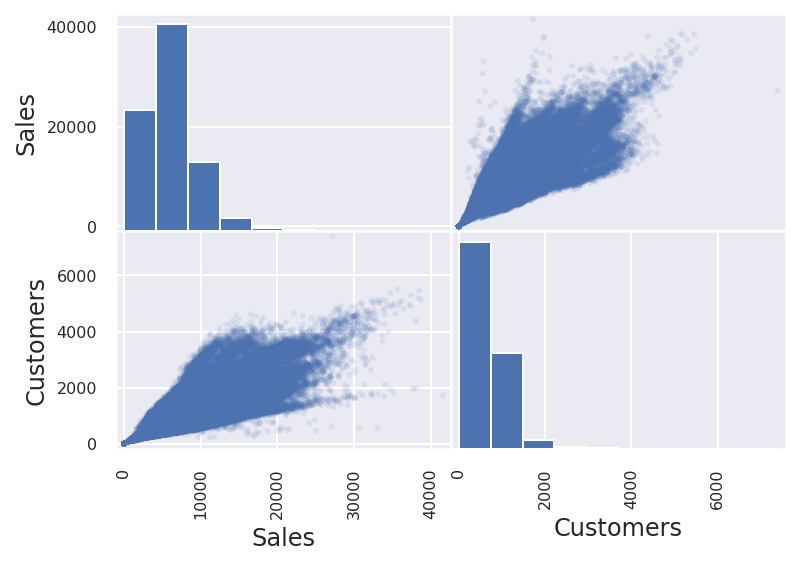

In [ ]:
#Sales_Customers
attributes = ["Sales", "Customers"]
pd.plotting.scatter_matrix(df[attributes], alpha=0.1)

Obviously, this feature is highly correlated to the target and may be a powerful predictor, but it is not in the test set, so we cannot use it except in making clusters or aggregations


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7de9404990>,
      dtype=object)

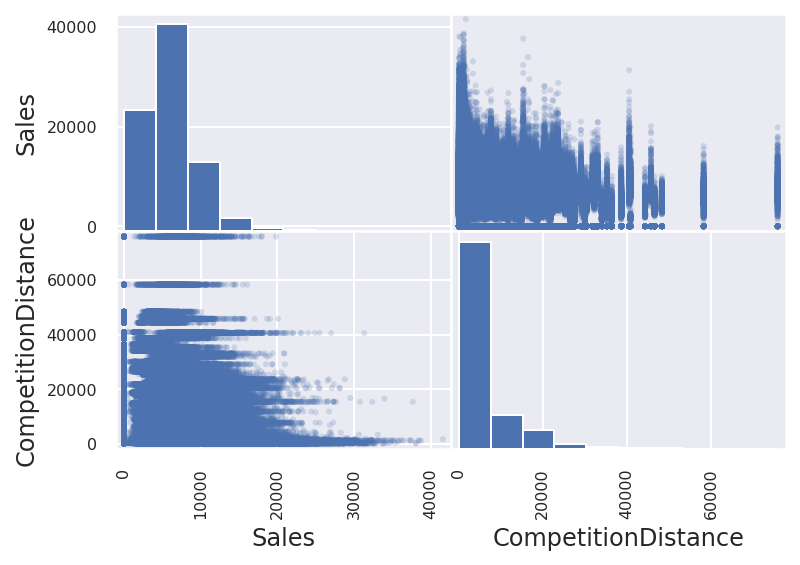

In [ ]:
#Sales_CompetitionDistance
attributes = ["Sales", "CompetitionDistance"]
pd.plotting.scatter_matrix(df[attributes], alpha=0.2)
# Well, it looks like the further stores distant from each other, the lower sales they get. This maybe due to that people tend to go to places where several same stores setting next to each other in order to get best prices.
# Also, several similar stores setting to each other may mean that their place is a big market within the city while that distant stores may mean that they are just small retailing stores


Well, it looks like the further stores distant from each other, the lower sales they get. This maybe due to that people tend to go to places where several same stores setting next to each other in order to get best prices.Also, several similar stores setting to each other may mean that their place is a big market within the city while that distant stores may mean that they are just small retailing stores

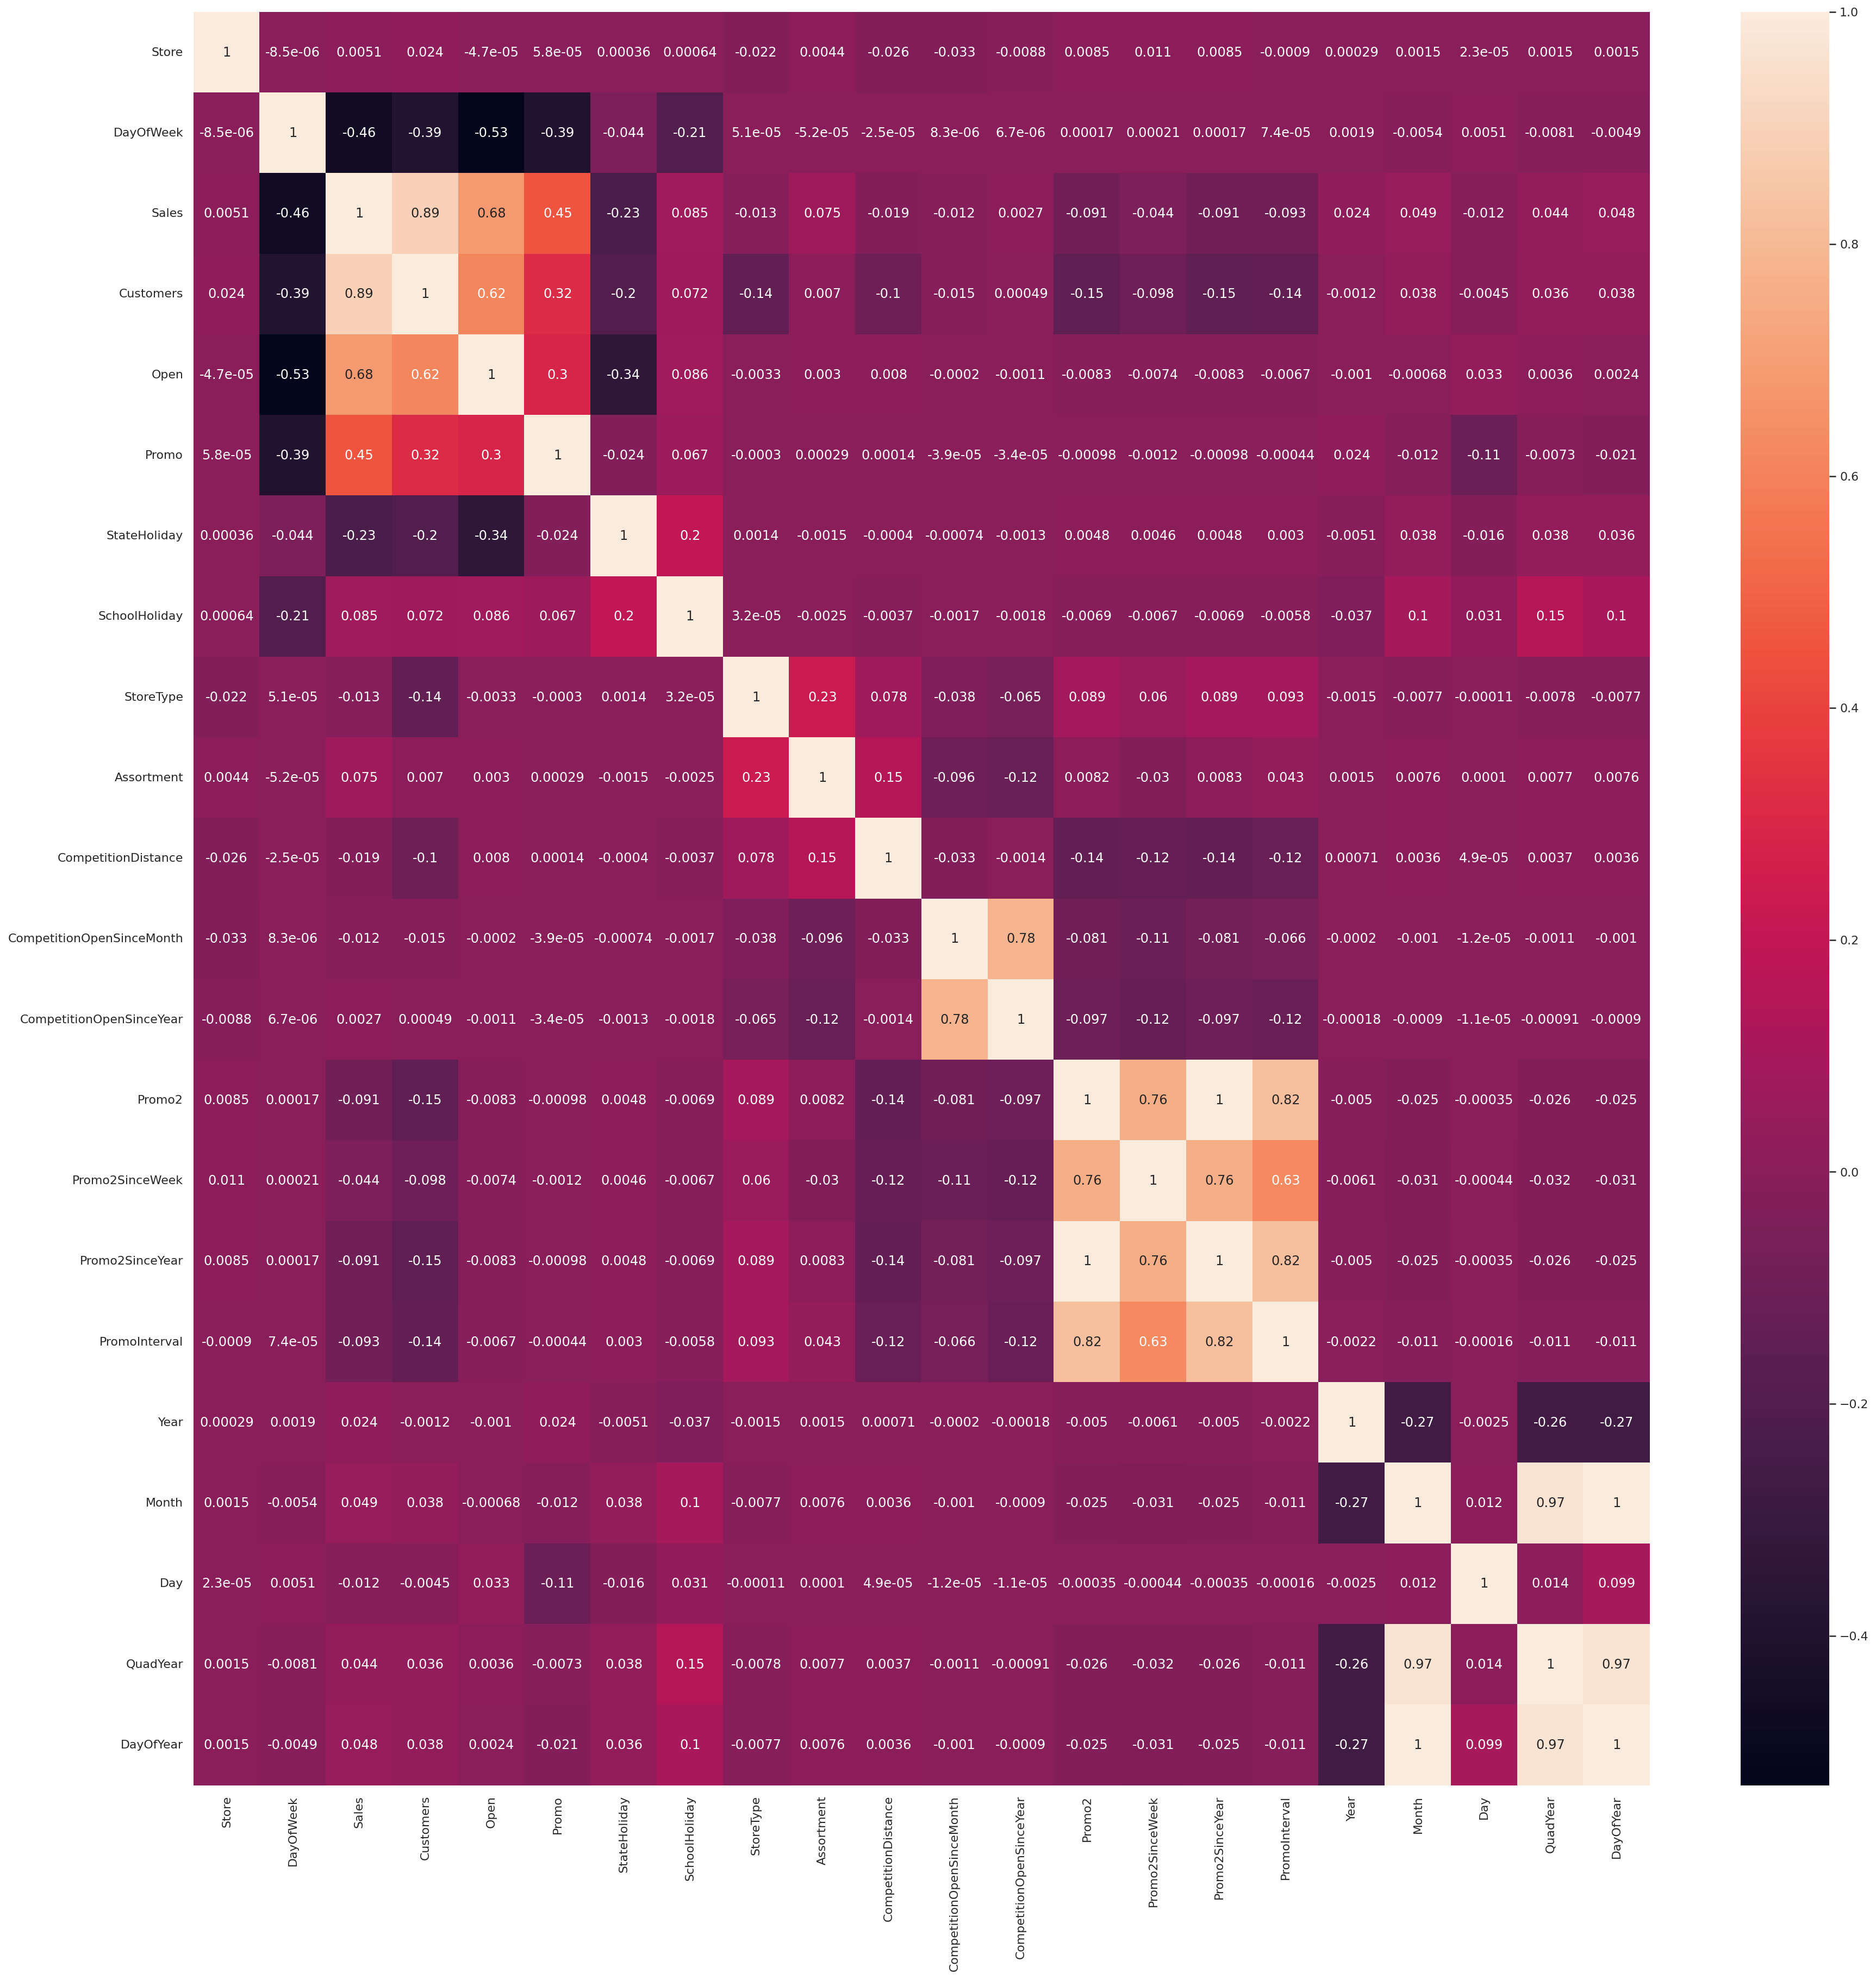

In [ ]:
correlations = df.corr()
f, ax = plt.subplots(figsize=(30,30))
sns.heatmap(correlations, annot = True)

#From above data we can observe multicollinearty features:

 day of year vs month vs quadyear  

 promo2 vs promo interval vs promo 2 since year vs promo 2 since week 

 open  vs sales vs customer

#For creating a model, it goes after baggage the efficiency, so we need to select any one from the respecting multicolinearity features so that we can reduce the baggage and get maximum efficiency.

##TRAINING AND TESTING MODEL 

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [17]:
#setting up the indepdent and dependent features for creating model 
x=df.drop(['Sales','Date','QuadYear','DayOfYear','PromoInterval','Promo2SinceWeek','Promo2SinceYear','CompetitionOpenSinceYear','Year'], axis=1)
y=df['Sales']

In [18]:
#creating the training and test data with limits
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 1000) 
print(x_train.shape)
print(x_test.shape)

(813767, 14)
(203442, 14)


In [19]:
#transforms data within range of 0-1 so that we can predict high effiency model
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

LINEAR REGRESSION

In [20]:
#linear regression method and excecuting with respect to the train and test data 
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [21]:
# prediction of model with respect to train
y_pred_train = reg.predict(x_train)
print(y_pred_train)
# prediction of model with respect to test
y_pred = reg.predict(x_test)
print(y_pred)

[6849.19428725 8302.55663817 7400.42265096 ... 6169.38804697 7669.80763887
 6896.16183688]
[ 2.69589433e+03  5.75462359e+02  4.77006287e+03 ...  3.64773461e+03
 -7.34038791e+00  8.96287744e+03]


In [22]:
print(f"Train performance: {math.sqrt(mean_squared_error(y_train, y_pred_train))}")
print(f"Test performance: {math.sqrt(mean_squared_error(y_train, y_pred_train))}")
print(f" R-square for predicted train: {r2_score(y_train, y_pred_train)}")
print(f" R-square for test: {r2_score(y_test, y_pred)}")

Train performance: 1406.9155109794283
Test performance: 1406.9155109794283
 R-square for predicted train: 0.8666563612894873
 R-square for test: 0.8672303384554428


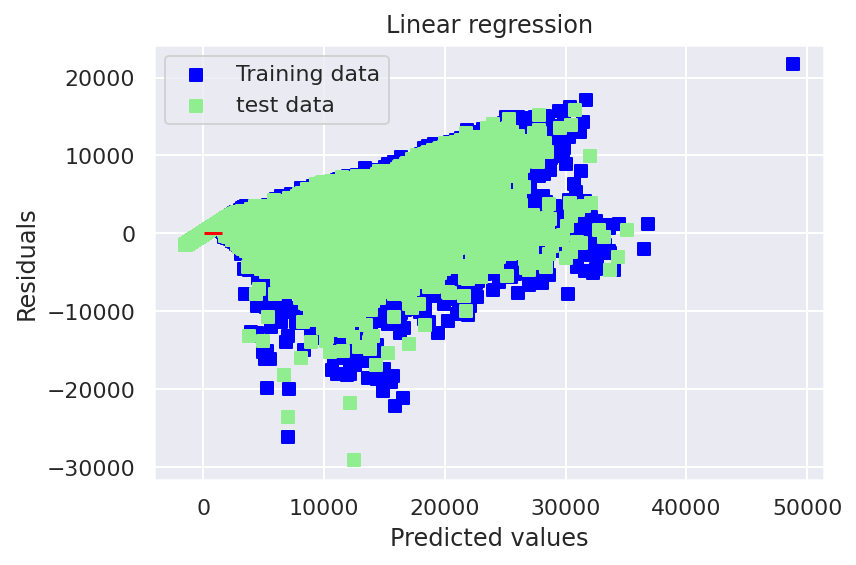

In [28]:
# Plot residuals
plt.hlines(y = 5, xmin = 1558.555, xmax = 13.5, color = "red")
plt.scatter(y_pred_train, y_pred_train - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_pred, y_pred - y_test, c = "lightgreen", marker = "s", label = "test data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")

plt.show()

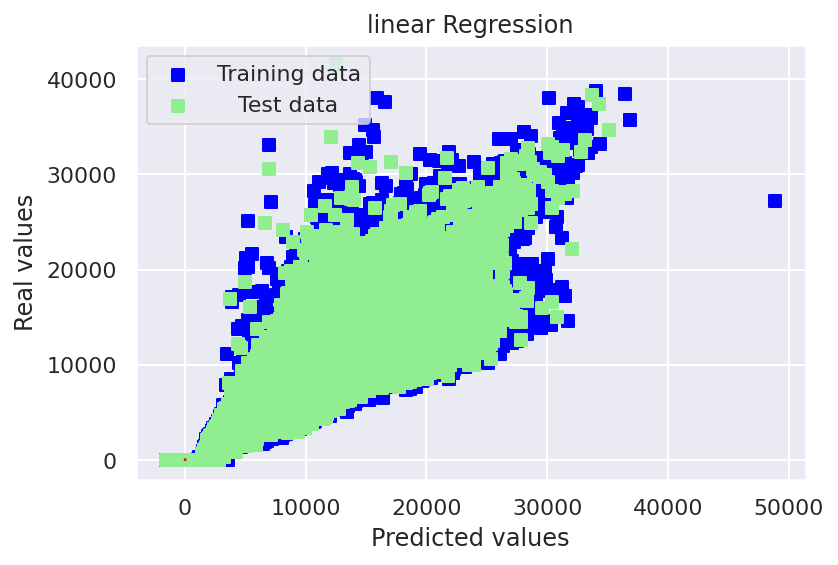

In [24]:
# Plot predictions
plt.scatter(y_pred_train, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_pred, y_test, c = "lightgreen", marker = "s", label = "   Test data")
plt.title("linear Regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

RANDOM FOREST REGRESSION

In [29]:
randomreg = RandomForestRegressor(n_estimators = 100, random_state = 0)
randomreg.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [30]:
y_pred_train = randomreg.predict(x_train)
print(y_pred_train)
y_pred = randomreg.predict(x_test)
print(y_pred)

[6745.07 9682.81 8530.68 ... 6349.78 6486.88 6155.24]
[1993.56    0.   3334.91 ... 2613.      0.   8813.58]


In [31]:
print(f"Train performance: {math.sqrt(mean_squared_error(y_train, y_pred_train))}")
print(f"Test performance: {math.sqrt(mean_squared_error(y_train, y_pred_train))}")
print(f" R-square for predicted train: {r2_score(y_train, y_pred_train)}")
print(f" R-square for test: {r2_score(y_test, y_pred)}")

Train performance: 172.47376478810307
Test performance: 172.47376478810307
 R-square for predicted train: 0.9979960708932786
 R-square for test: 0.9857699037693892


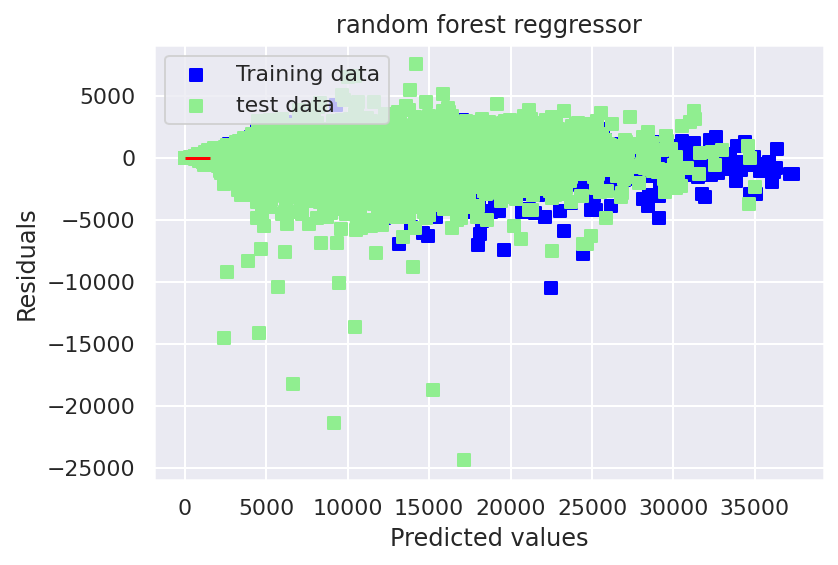

In [32]:
# Plot residuals
plt.hlines(y = 0, xmin = 1558.555, xmax = 13.5, color = "red")
plt.scatter(y_pred_train, y_pred_train - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_pred, y_pred - y_test, c = "lightgreen", marker = "s", label = "test data")
plt.title("random forest reggressor")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.hlines(y = 0, xmin = 1558.555, xmax = 13.5, color = "red")
plt.show()


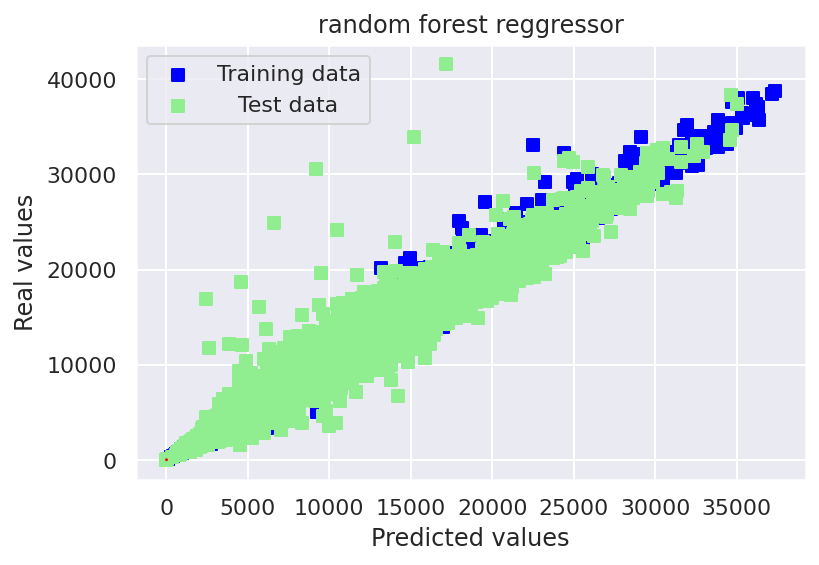

In [33]:
# Plot predictions
plt.scatter(y_pred_train, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_pred, y_test, c = "lightgreen", marker = "s", label = "   Test data")
plt.title("random forest reggressor")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

conclusion:

Exploratory data analysis: 

From the dataset above, we can describe a few relationships between Rossmann sales of stores with different perspectives and scenarios.

The sales at Rossmann are directly proportional to the distance between the other stores.

Rossmann's sales are not directly proportional to promo or promo2, but they still provide us with a 10–30% increase in sales.





## MODEL
# LINEAR REGRESSION
From the linear model we can see that

Train performance: 1406.9155109794283

Test performance: 1406.9155109794283

 R-square for predicted train: 0.8666563612894873

 R-square for test: 0.8672303384554428

# RANDOM FOREST REGRESSOR
From the random forest model we can see that

Train performance: 172.47376478810307

Test performance: 172.47376478810307

 R-square for predicted train: 0.9979960708932786

 R-square for test: 0.9857699037693892

# From both the model we can see that linear model predicts 86% where as roandom forest regreeor predicts 98.5% from this we can conclude that the random forest has high effiency than linear model 